# Problem1:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

#Problem 1B:

What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

Explain the business implications of performing ANOVA for this particular case study.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [3]:
salarydata = pd.read_csv("D:/Study/DSBA - ADVANCE STATS/SalaryData.csv")

In [37]:
salarydata.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
salarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [9]:
salarydata.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40,NaN,NaN,NaN,162187,64860.4,50103,99897.5,169100,214441,260151


In [23]:
salarydata.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

# PROBLEM 1A:

State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

In [12]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

# Ans 1: ONE WAY ANOVA FOR EDUCATION:

𝐻0  : The means of 'Salary' variable with respect to each Education category is equal.

𝐻1  : At least one of the means of 'Salary' variable with respect to each Education
    category is unequal.

In [13]:
formula = 'Salary ~ C(Education)'
model = ols(formula, salarydata).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


# Ans 2: 
Since the p value in this scenario is less than  𝛼  (0.05), we can say that we reject the Null Hypothesis ( 𝐻0 ).

In [14]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, salarydata).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


# Ans 3: 
Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$).

In [20]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [24]:
f, p = stats.f_oneway(salarydata[salarydata['Education'] == 'Doctorate'].Salary,
                      salarydata[salarydata['Education'] == 'Bachelors'].Salary,
                      salarydata[salarydata['Education'] == 'HS-grad'].Salary)
p

C:\Users\baska\anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


nan

<AxesSubplot:xlabel='Education', ylabel='Salary'>

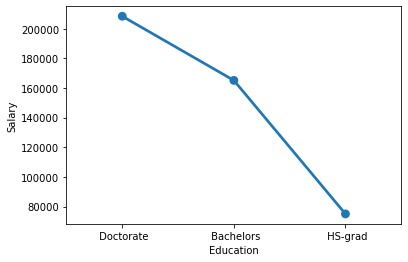

In [22]:
sns.pointplot(x = 'Education', y = 'Salary', data = salarydata, ci = None)

In [26]:
compare = MultiComparison(salarydata['Salary'], salarydata['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


# Ans 4: 
Above result shows no class means are significantly different. 

Problem 1B:

What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


Explain the business implications of performing ANOVA for this particular case study.

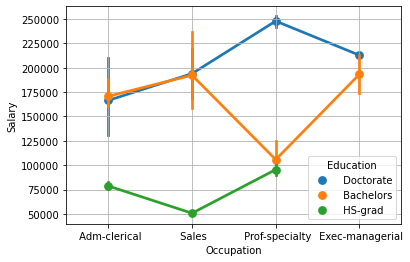

In [34]:
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education',data=salarydata)
plt.grid()
plt.show()

# Ans 1B 1: 

As seen from the above two interaction plots, there seems to be interaction of 
    
1. Interaction of Doctorate and Bachelors Education are more with Adm-Clerical and Sales occupation. 

2. Interaction of Doctorate and Bachelors Education are less with Exec - Managerial occupation.

3. Interaction of Bachelors and HS-grad Education are more with Prof-Speciality occupation.


In [35]:
#Interaction Effect:
model=ols('Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)',data=salarydata).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


# Ans 1B, 2:

Point 1: p-value of Education is 5.44e-12 which is less than 𝛼 0.05 and we can reject the Null Hypothesis ( 𝐻0 ). This shows that the means of 'Salary' variable with respect to each Education category is equal.

Point 2: p-value of Education is 0.072 which is greater than 𝛼 0.05 and we fail to reject the Null Hypothesis ( 𝐻0 ). This shows that the means of 'Salary' variable with respect to each Occupation category is not equal.

Point 3: As Education and Occupation interaction is 0.00002232 which is <0.05 , there seems to be more statistical interaction.

# Ans 1B, 3:


the business implications of performing ANOVA for this particular case study.

# Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

Is scaling necessary for PCA in this case? Give justification and perform scaling.

Comment on the comparison between the covariance and the correlation matrices from this data.

Check the dataset for outliers before and after scaling. What insight do you derive here?

Perform PCA and export the data of the Principal Component scores into a data frame.

Extract the eigenvalues and eigenvectors.[print both]

Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [39]:
df = pd.read_csv("D:/Study/DSBA - ADVANCE STATS/Education+-+Post+12th+Standard.csv")

In [40]:
df

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [41]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [61]:
df.shape

(777, 18)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


# Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?


In [45]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [59]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

##### Observation:

Data has been loaded correctly into the pandas dataframe 

There are 777 rows and 18 features

There are no missing values observed in given file

'Name'is categorised as object type, S.F Ratio is given as Float type and remaining are in Numeric tyoe

The dataset provided is about current college records to check the better performance to choose the post +2 admission

THere are no duplicate records

## UNIVARIATE ANALYSIS

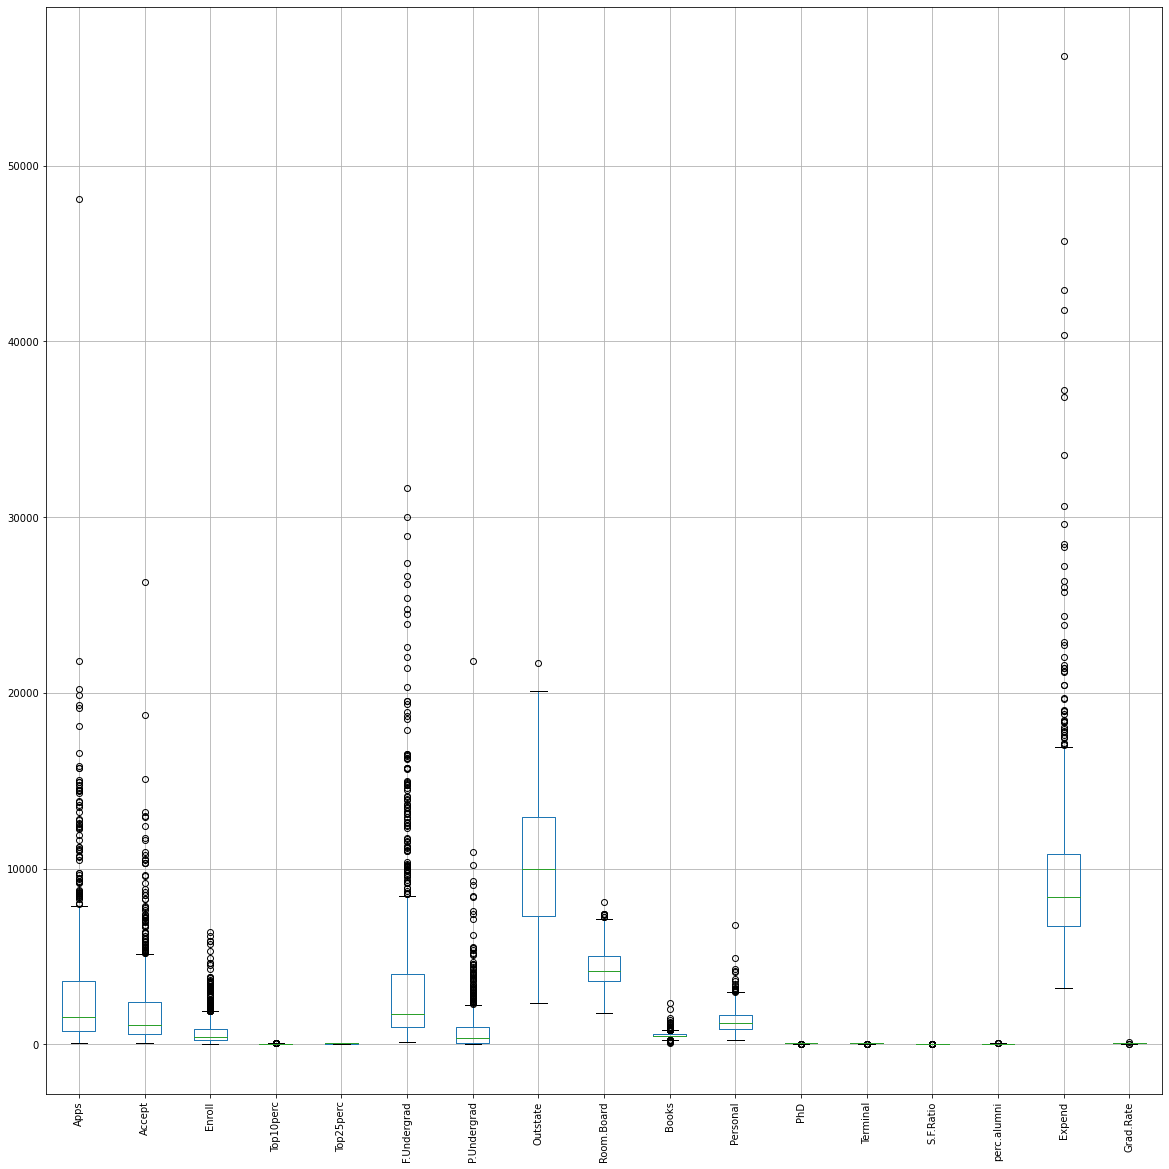

In [85]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Expend'>

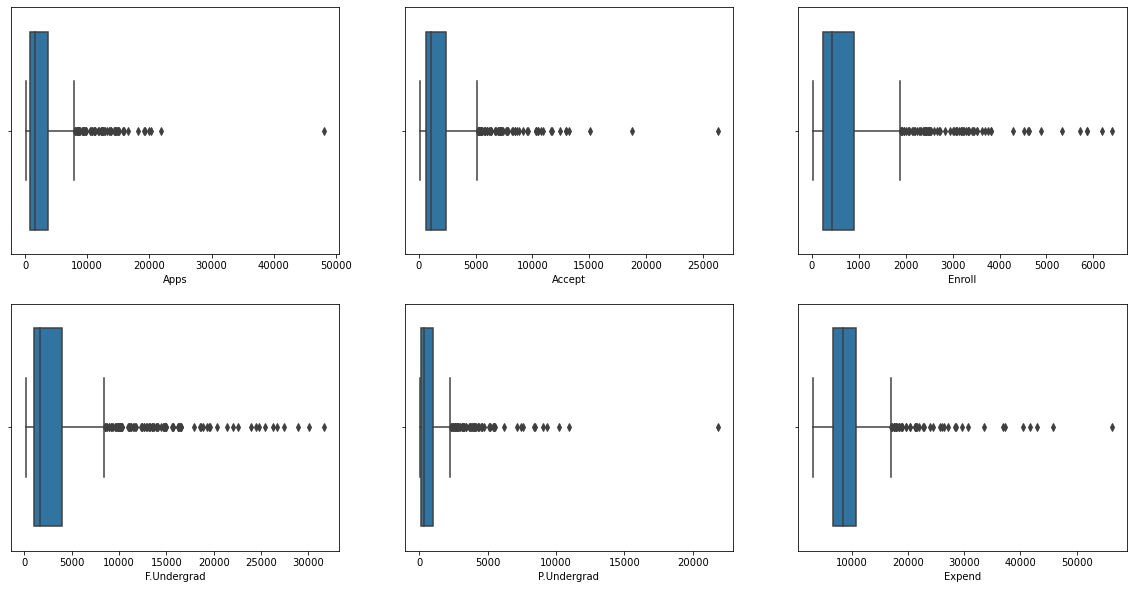

In [80]:
fig_dims = (20, 10) 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims) 
sns.boxplot(x='Apps',data=df, ax=axs[0][0])
sns.boxplot(x='Accept',data=df, ax=axs[0][1])
sns.boxplot(x='Enroll',data=df, ax=axs[0][2])
sns.boxplot(x='F.Undergrad',data=df, ax=axs[1][0])
sns.boxplot(x='P.Undergrad',data=df, ax=axs[1][1])
sns.boxplot(x='Expend',data=df, ax=axs[1][2])

Median value of each categories are different 


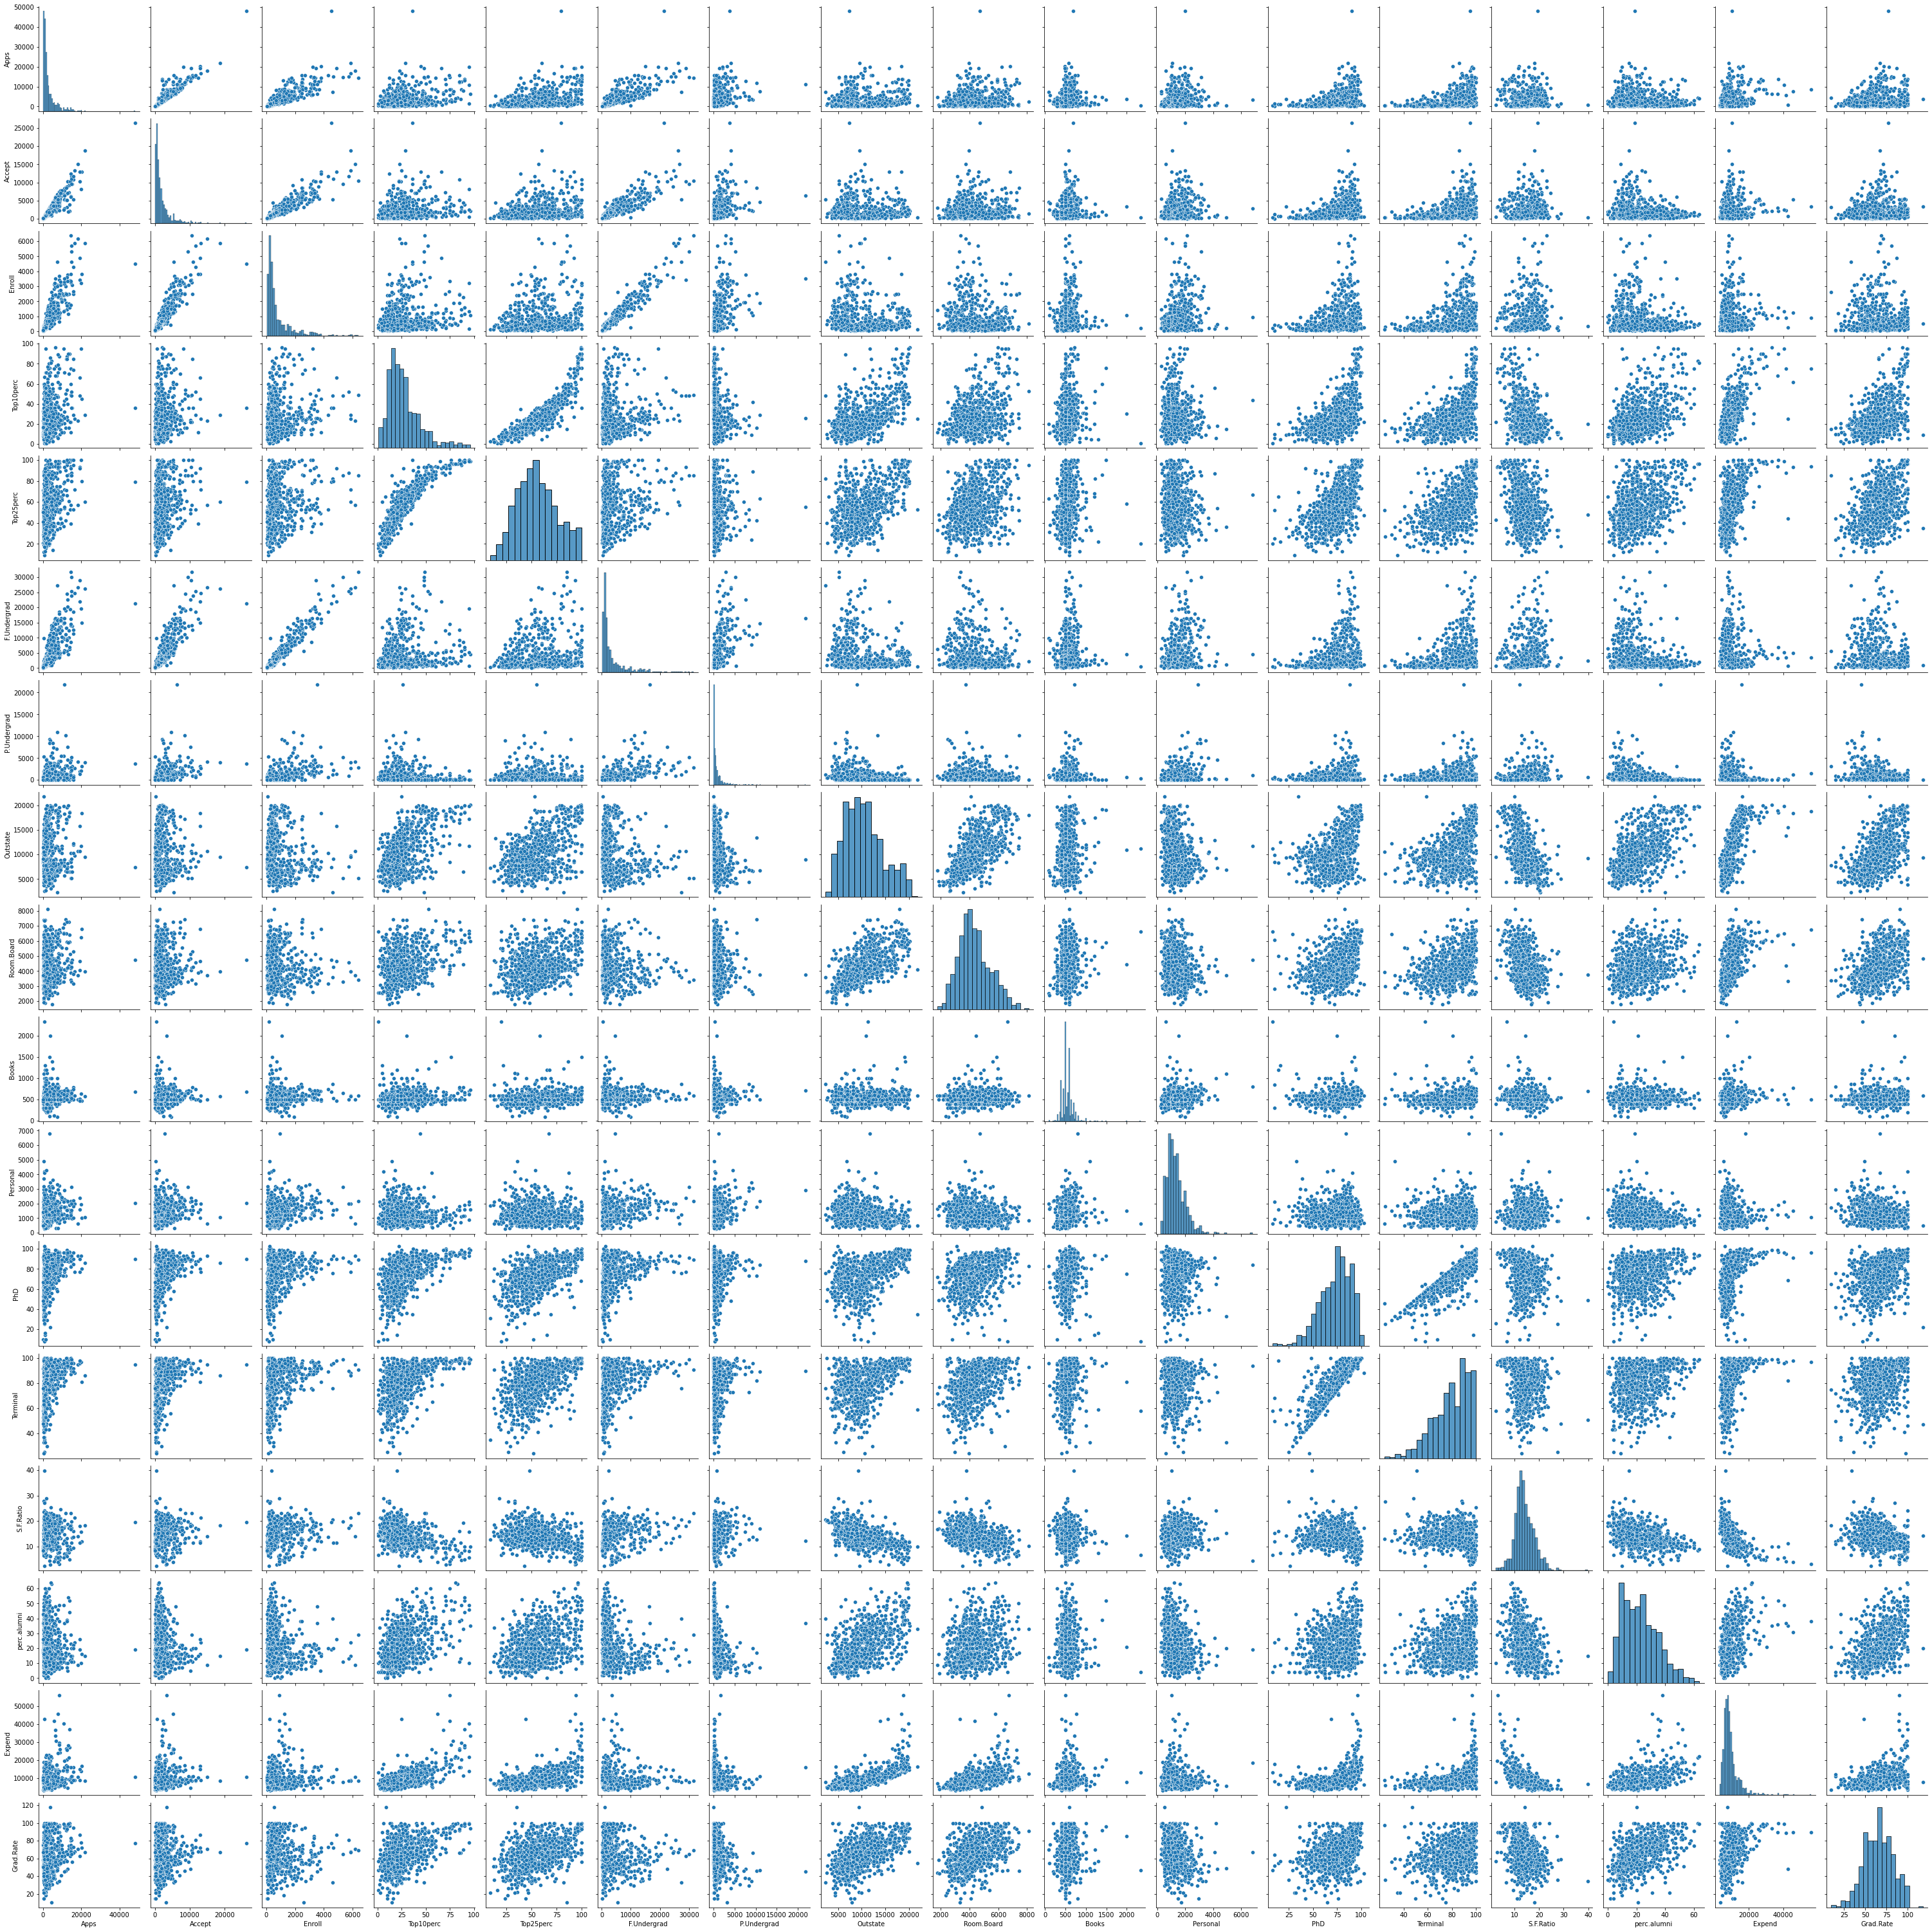

In [82]:
sns.pairplot(df)

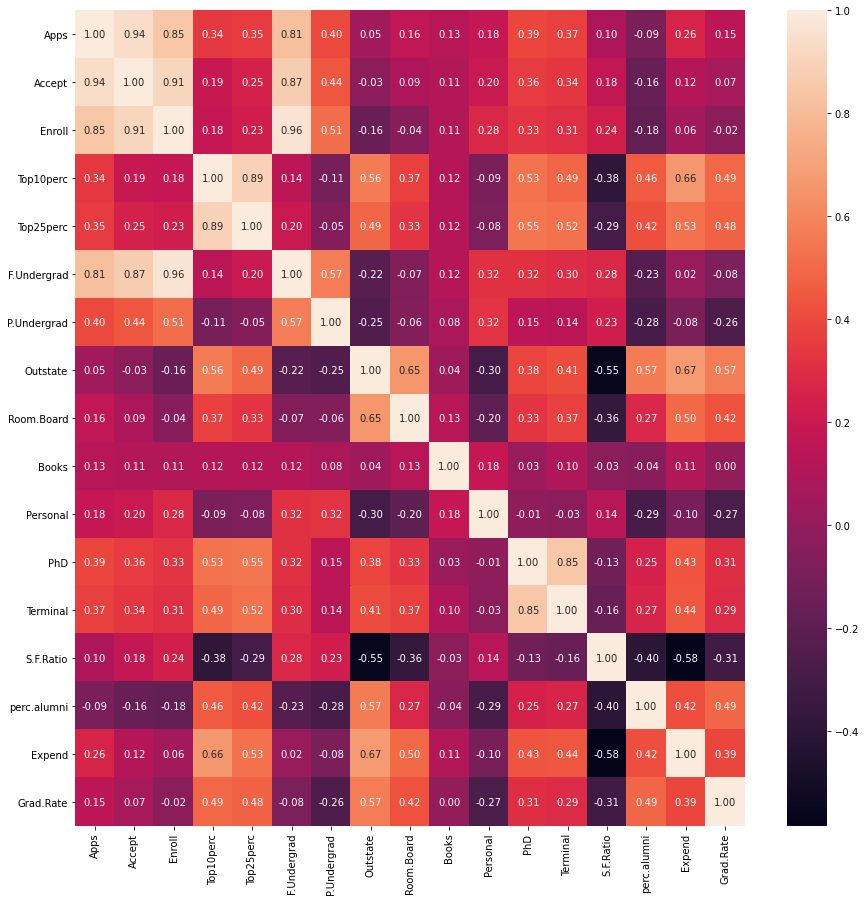

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

Correlation of 

Apps and Accept are more 

Accept and Enrol are more

Top10percentage and Top25 percentage are more

Enrol and F.Undergraduate are more

# Ans 1B 2:
    
Given Dataset has the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features. We can speed up gradient descent by scaling.

In [92]:
df.drop(labels='Names',axis=1,inplace=True)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [93]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [94]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [95]:
df_scaled.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,6.355797e-17,6.774575e-17,-5.249269e-17,-2.753232e-17,-1.546739e-16,-1.661405e-16,-3.029180e-17,6.515595e-17,3.570717e-16,-2.192583e-16,4.765243e-17,5.954768e-17,-4.481615e-16,-2.057556e-17,-6.022638e-17,1.213101e-16,3.886495e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-5.615022e-01,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-4.997191e-01,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-3.301442e-01,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,7.341765e-02,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,1.378992e+01,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


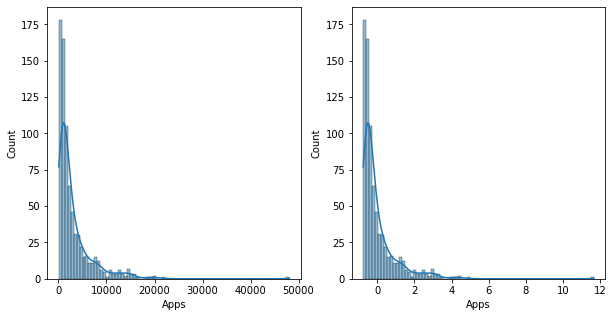

In [96]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['Apps'] , kde=True, ax=axes[0])
sns.histplot(df_scaled['Apps'] , kde=True, ax=axes[1])
plt.show()

# Ans 1B 3:

Applying zscore give us the same results

It scales the data in such a way that the mean value of the features tends to 0 and the standard deviation tends to 1

Min-Max method ensure that the data scaled to have values in the range 0 to 1

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
college_std = StandardScaler().fit_transform(df)


In [101]:
mean_vec = np.mean(college_std, axis=0)
cov_mat = (college_std - mean_vec).T.dot((college_std - mean_vec)) / (college_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0

In [102]:
cov_mat = np.cov(college_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
  -3.

In [103]:
eig_vals

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

In [104]:
eig_vecs

array([[-2.48765602e-01,  3.31598227e-01,  6.30921033e-02,
        -2.81310530e-01,  5.74140964e-03,  1.62374420e-02,
         4.24863486e-02,  1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02,  3.58970400e-01, -4.59139498e-01,
         4.30462074e-02, -1.33405806e-01,  8.06328039e-02,
        -5.95830975e-01,  2.40709086e-02],
       [-2.07601502e-01,  3.72116750e-01,  1.01249056e-01,
        -2.67817346e-01,  5.57860920e-02, -7.53468452e-03,
         1.29497196e-02,  5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02, -5.43427250e-01,  5.18568789e-01,
        -5.84055850e-02,  1.45497511e-01,  3.34674281e-02,
        -2.92642398e-01, -1.45102446e-01],
       [-1.76303592e-01,  4.03724252e-01,  8.29855709e-02,
        -1.61826771e-01, -5.56936353e-02,  4.25579803e-02,
         2.76928937e-02, -5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.09651110e-01,  4.04318439e-01,
        -6.93988831e-02, -2.95896092e-02, -8.56967180e-02,
         4.44638207e-01,  1.1

In [129]:
idx = eig_vals.argsort()[::-1]   
eig_vals= eig_vals[idx]
eig_vecs = eig_vecs[:,idx]



Transformation of Data

Now all we need to do is represent our data in the basis given by the eigenvectors. This involves taking the inverse of the eigenvectors matrix and multiply with the original dataset.

In [115]:
M = np.linalg.inv(eig_vecs)

In [116]:
M

array([[-2.48765602e-01, -2.07601502e-01, -1.76303592e-01,
        -3.54273947e-01, -3.44001279e-01, -1.54640962e-01,
        -2.64425045e-02, -2.94736419e-01, -2.49030449e-01,
        -6.47575181e-02,  4.25285386e-02, -3.18312875e-01,
        -3.17056016e-01,  1.76957895e-01, -2.05082369e-01,
        -3.18908750e-01, -2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [ 6.30921033e-02,  1.01249056e-01,  8.29855709e-02,
        -3.50555339e-02,  2.41479376e-02,  6.13929764e-02,
        -1.39681716e-01, -4.65988731e-02, -1.48967389e-01,
        -6.77411649e-01, -4.99721120e-01,  1.27028371e-01,
         6.60375454e-02,  2.89848401e-01,  1.46989274e-01,
        -2.26743985e-01,  2.0

In [118]:
#Now we go ahead and obtain the new set of datapoints
#By multiply M with each datapoint
#We'll take a transpose of the orginal dataset to do this directly for all the points

Data2 = M @ df.T

In [119]:
#Now let's do a transpose again to find the datapoints in the new basis representation
NewData = Data2.T
#Rounding off for better readability
NewData.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-6539.27,-61.14,-3413.61,-2723.83,3554.16,2461.96,-1113.51,1126.99,72.02,-3635.05,4499.21,-2754.54,2265.33,72.47,1226.78,-1752.99,-692.64
1,-10098.02,-1823.82,-4785.77,-4625.46,7048.07,2842.51,-1045.42,1456.19,-887.45,-5720.12,6581.83,-4612.65,2723.20,40.46,1842.87,-1837.62,-791.12
2,-7897.00,-2726.79,-3606.88,-3411.21,4973.62,2521.97,-631.60,1423.21,-13.09,-4607.86,6198.38,-5202.21,2130.10,123.45,1510.94,-1173.46,-39.27
3,-11647.20,-5732.81,-6336.04,-4231.55,7100.77,5178.53,1286.22,2195.81,-259.83,-6650.05,12994.49,-2590.08,3923.29,641.31,3815.44,-563.97,-174.72
4,-6944.76,-2995.69,-4786.84,-2252.15,4643.07,2950.25,-77.56,1129.99,-729.34,-4036.47,7217.29,-1340.94,2197.54,308.78,2182.19,-249.21,-66.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-5926.95,910.04,-2577.56,-2776.26,4254.33,1514.52,-1172.07,90.38,-1047.51,-2933.97,2588.81,-2927.40,1449.91,-82.09,601.51,-2007.13,-772.76
773,-9097.76,-1334.95,-3965.84,-4116.23,5952.84,2649.09,-826.48,1046.46,-519.51,-4937.06,6039.74,-4899.97,2748.03,11.31,1582.15,-1843.12,-758.75
774,-7310.73,-291.26,-3079.42,-3613.59,4254.82,2035.65,25.96,1335.51,128.21,-3906.21,4960.67,-1592.67,1950.86,139.59,1582.09,-1461.28,-958.92
775,-24675.20,-3498.04,-11146.43,-10879.39,10438.68,12282.68,4996.11,4494.85,2380.59,-11975.16,28233.29,-740.78,3167.45,2459.35,7254.52,-6069.64,733.17


In [120]:
np.cov(NewData.T).round(2)

array([[ 1.40265823e+07, -6.04513172e+06,  2.45084288e+06,
         8.53431100e+06, -4.69705617e+06, -5.25455797e+06,
        -2.77476355e+06, -1.20321189e+06, -2.41551132e+06,
         5.27553454e+06, -1.05391762e+07,  2.08369016e+06,
        -4.34805180e+05, -1.05728625e+06, -2.41947627e+06,
         6.35735433e+06,  2.14816636e+06],
       [-6.04513172e+06,  2.54853094e+07,  4.27379618e+06,
        -7.51186781e+06, -2.41391772e+06,  1.02149682e+06,
         4.81118320e+05, -2.70894825e+06,  2.77515947e+06,
         1.66622208e+06, -6.07914172e+06,  4.95910150e+06,
        -9.90971050e+05,  7.00130700e+04, -1.81349035e+06,
        -1.19504716e+07, -7.38291859e+06],
       [ 2.45084288e+06,  4.27379618e+06,  2.17013578e+06,
         2.73837090e+05, -1.82039933e+06, -1.67760938e+06,
        -7.32036860e+05, -7.72329120e+05,  2.23386430e+05,
         1.76488008e+06, -5.02308833e+06,  9.09359110e+05,
        -5.98361300e+05, -3.51880030e+05, -1.34794708e+06,
        -1.13871148e+06, -1.0

In [130]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


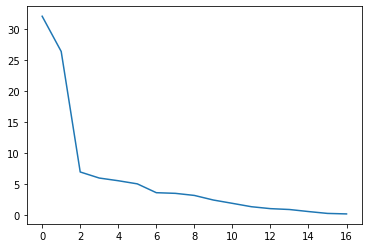

In [131]:
plt.plot(var_exp)

Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
We will proceed with 14 components here. But depending on requirement 90% variation or 10 components will also do good